In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras

In [13]:
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [4]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [5]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
def plot_input_img(i):
    plt.imshow(X_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.show()

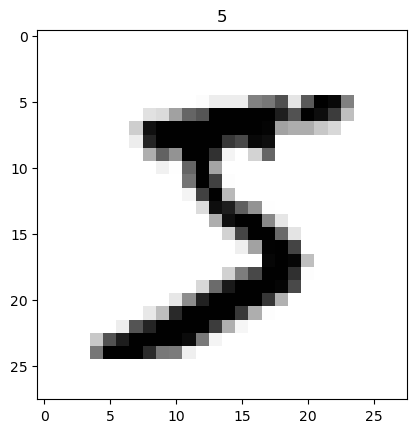

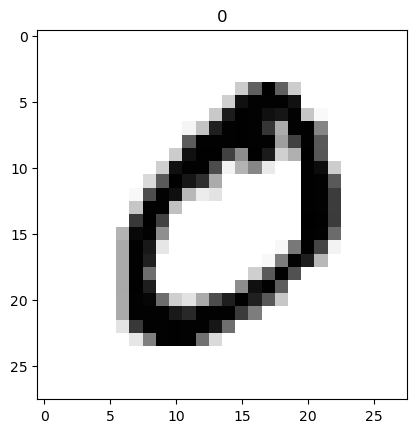

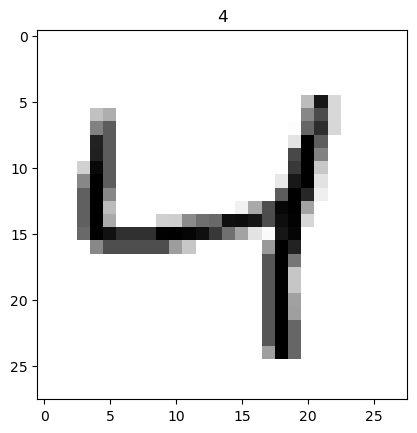

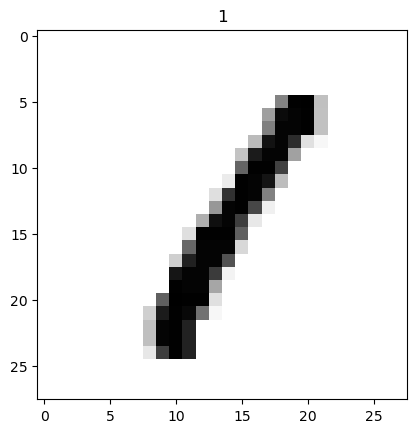

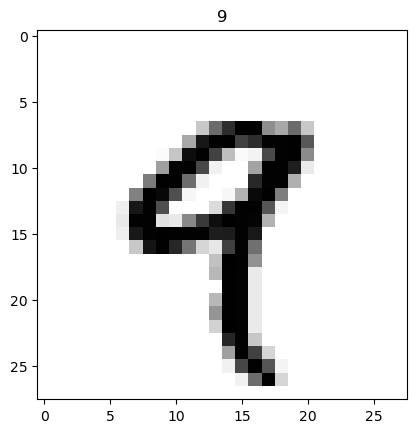

In [9]:
for i in range(5):
    plot_input_img(i)

In [10]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [11]:
X_train.shape

(60000, 28, 28, 1)

In [12]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [15]:
model= Sequential()

model.add(Conv2D(32, (3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10,activation="softmax"))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [17]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [24]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

es= EarlyStopping(monitor='val_acc',min_delta=0.01,patience=4,verbose=1)

mc=ModelCheckpoint("E://hand digit recog\bestmodel.h5",monitor='val_acc',verbose=1,save_best_only=True)

cb=[es,mc]